# Data Evaluation
Use this notebook to get an overview of your corpus.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import metadata_toolbox.utils as metadata
from pathlib import Path
import pandas as pd
#import statistics
import collections
import os
import shutil
import re
from collections import OrderedDict
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from termcolor import colored

In [22]:
data = 'Y:/data/projekte/dispecs/TopicModeling'

In [3]:
language = 'es'

In [4]:
output = data + '/output/DataEvaluation/'

In [5]:
path_to_folder = Path(data, 'dispecs_'+language) #_minlen500w #_paragraph_minlen500w

## Evaluate periodicals and authors in the corpus

In [6]:
# make a pandas data frame using file names
pattern = '{year}_{periodical}_{author}_{volume}_{issue}_{id}' #_{paragraph} #bsp. 1711-1712_Le-Misantrope_Justus-Van-Effen_Avertissement_2948

meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in path_to_folder.glob('*.txt')])
meta[:5] # by adding '[:5]' to the variable, only the first 5 elements will be printed

,year,periodical,author,volume,issue,id
Y:\data\projekte\dispecs\topicModeling\dispecs_es\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-001_112-821.txt,1735-1736,El-Duende-Crítico,Frai-Manuel-de-San-Josef,Vol-1,Nr-001,112-821
Y:\data\projekte\dispecs\topicModeling\dispecs_es\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-002_112-822.txt,1735-1736,El-Duende-Crítico,Frai-Manuel-de-San-Josef,Vol-1,Nr-002,112-822
Y:\data\projekte\dispecs\topicModeling\dispecs_es\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-003_112-840.txt,1735-1736,El-Duende-Crítico,Frai-Manuel-de-San-Josef,Vol-1,Nr-003,112-840
Y:\data\projekte\dispecs\topicModeling\dispecs_es\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823.txt,1735-1736,El-Duende-Crítico,Frai-Manuel-de-San-Josef,Vol-1,Nr-004,112-823
Y:\data\projekte\dispecs\topicModeling\dispecs_es\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-005_112-824.txt,1735-1736,El-Duende-Crítico,Frai-Manuel-de-San-Josef,Vol-1,Nr-005,112-824


In [7]:
# make a dictionary with unique authors
authors = meta.groupby('author')['id'].nunique().to_dict()
authors

{'Anonym': 1,
 'Anonym-(García-de-Cañuelo,-Luis+-Pereira,-Luis-Marcelino)': 168,
 'Antonio-Mauricio-Garrido': 4,
 'Anónimo': 102,
 'Anónimo-(Francisco-del-Valle-Inclán)': 22,
 'Anónimo-(Manuel-Rubín-de-Celis-y-Noriega)': 2,
 'Anónimo-(Ventura-Ferrer)': 130,
 'Bachiller-D.-P.-Gatell': 27,
 'Beatriz-Cienfuegos': 52,
 'Escolástica-Hurtado': 1,
 'Eugenio-Habela-Patiño': 1,
 'Frai-Manuel-de-San-Josef': 21,
 'Francisco-Mariano-Nifo-y-Cagigal': 2,
 'Joseph-Álvarez-y-Valladares-(José-Clavijo-y-Faxardo)': 87,
 'José-Joaquín-Fernández-de-Lizardi': 13,
 'Juan-Antonio-Mercadal-(Francisco-Mariano-Nipho-o-Juan-Enrique-de-Graef)': 18,
 'Juan-José-López-de-Sedano': 6,
 'Juan-Nosip-y-Vargas': 8,
 'Marchena,-José': 6,
 'Pedro-Pablo-Trullench': 7,
 'Vicente-Serraller-y-Aemor': 12}

Depending on which language you are analyzing, you might notice different language variants of the word "anonymous" in the column "author". We can correct this in the data frame by replacing the respective string with "Anonymous".  

In [8]:
# string replace to make corrections
str_to_replace = [r'\bAnonymus\b', r'\bAnonym\b', r'\bAnonyme\b', r'\bAnónimo\b']
for string in str_to_replace:
    meta['author'] = meta['author'].str.replace(string, "Anonymous", regex=True)

In [58]:
# make a dictionary with unique authors
authors = meta.groupby('author')['id'].nunique().to_dict()
authors = collections.OrderedDict(sorted(authors.items(), key=lambda x:x[1], reverse=True))
authors

OrderedDict([('Cesare-Frasponi', 393),
             ('Giovanni-Ferri-di-S.-Costante', 261),
             ('Gasparo-Gozzi', 248),
             ('Antonio-Piazza', 245),
             ('Luca-Magnanima', 39),
             ('Gioseffa-Cornoldi-Caminer', 36),
             ('Francesco-Grassi', 34),
             ('Giuseppe-Baretti', 33),
             ('Francesco-Anselmi', 30),
             ('Pietro-und-Alessandro-Verri', 18),
             ('Anonymous-(Eliza-Haywood)', 7)])

In [59]:
# make a dictionary with unique periodicals 
periodicals = meta.groupby('periodical')['id'].nunique().to_dict()
periodicals = collections.OrderedDict(sorted(periodicals.items(), key=lambda x:x[1], reverse=True))
periodicals

OrderedDict([('Il-Filosofo-alla-Moda', 393),
             ('Lo-Spettatore-italiano', 261),
             ('Gazzetta-urbana-veneta', 245),
             ('L’Osservatore-veneto', 104),
             ('Gazzetta-veneta', 103),
             ('Gli-Osservatori-veneti', 41),
             ('Osservatore-toscano', 39),
             ('La-donna-galante-ed-erudita', 36),
             ('Lo-Spettatore-italiano-piemontese', 34),
             ('La-Frusta-Letteraria-di-Aristarco-Scannabue', 33),
             ('Il-Socrate-veneto', 30),
             ('Il-Caffè', 18),
             ('La-Spettatrice', 7)])

## Visualize

<IPython.core.display.Javascript object>


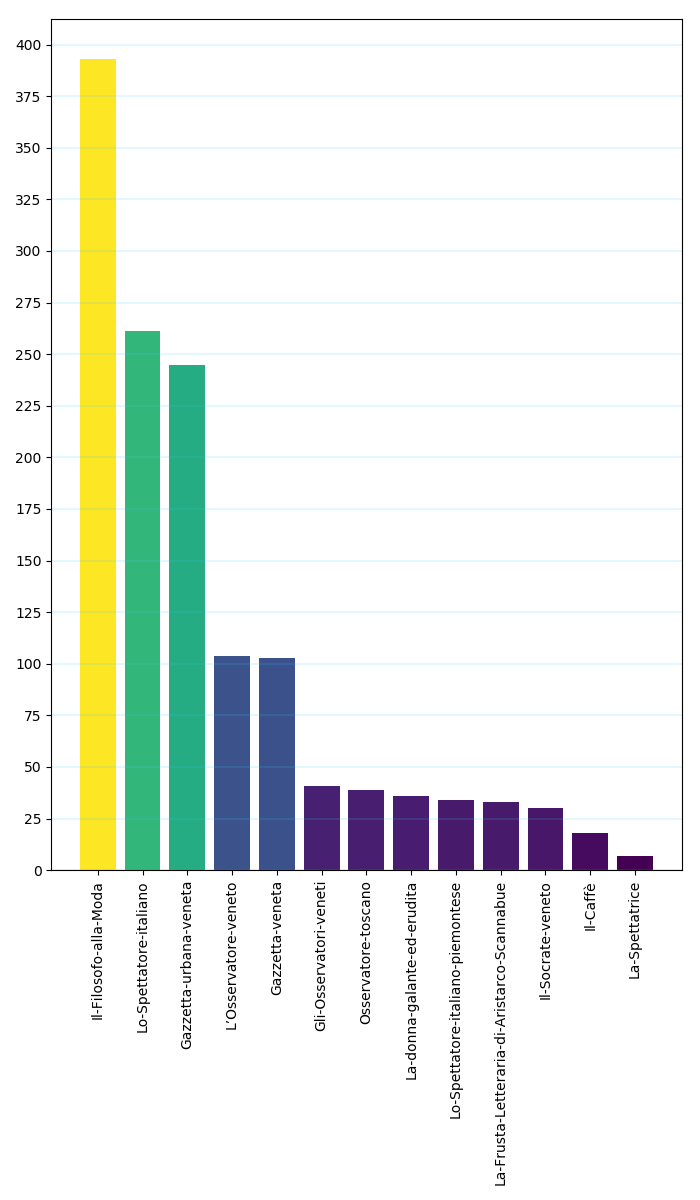

In [60]:
# bar chart of periodicals
%matplotlib notebook
cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(periodicals.items(), key=lambda k: k[1])[1], vmax=max(periodicals.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(periodicals.values())]
plt.bar(range(len(periodicals)), list(periodicals.values()), align='center', color=color)
plt.xticks(range(len(periodicals)), list(periodicals.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+language+'_periodicals.png', dpi=500) #, bbox_inches='tight'

<IPython.core.display.Javascript object>


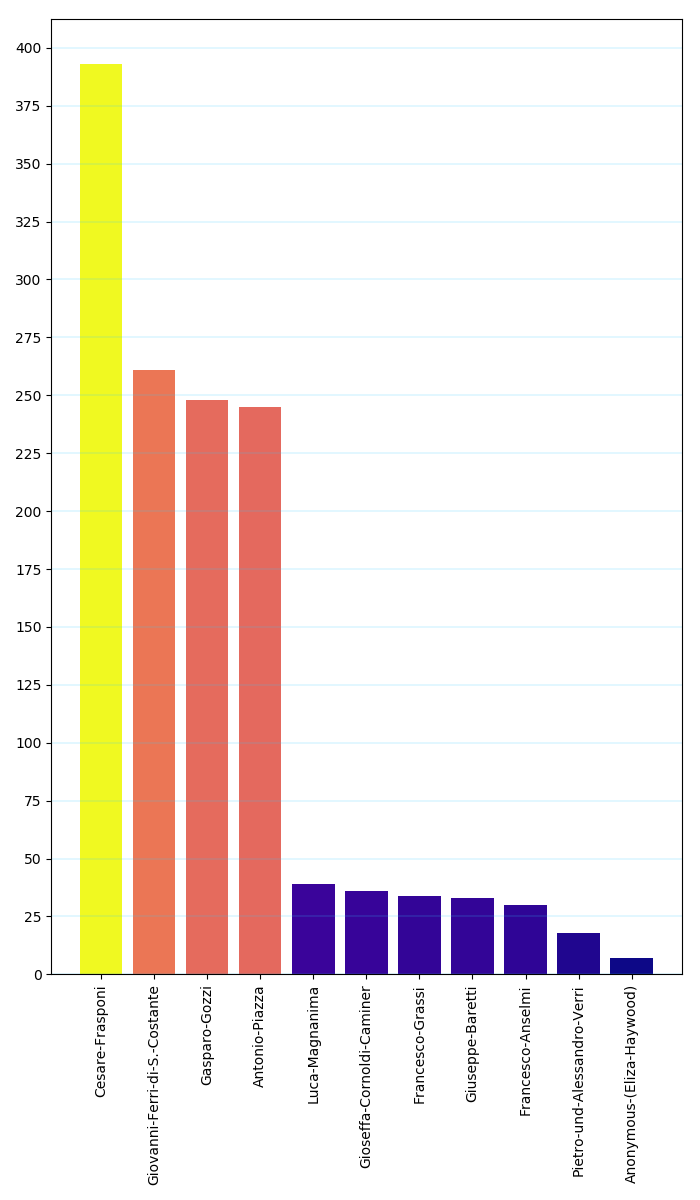

In [61]:
# bar chart of authors
%matplotlib notebook
cmap = mpl.cm.get_cmap("plasma")
norm = mpl.colors.Normalize(vmin=min(authors.items(), key=lambda k: k[1])[1], vmax=max(authors.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(authors.values())]
plt.bar(range(len(authors)), list(authors.values()), align='center', color=color)
plt.xticks(range(len(authors)), list(authors.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+language+'_authors.png', dpi=500) #, bbox_inches='tight'

## Count tokens per document

In [22]:
def count_words(filename):
    """Count number of words for a file."""
    input = open(filename, 'r', encoding="utf-8")
    words = " ".join(re.sub(',|\.|\;|\:|\(|\)|\-','',input.read()).split()).split(' ') # remove special charachters and normalize space
    input.close()
    chunks = []
    words_list = []
    for word in words:
        words_list.append(word)
    return len(words_list)

In [36]:
# create a data frame for number of tokens per file:
df_lens = pd.DataFrame(columns=["file","tokens"])
for file in path_to_folder.glob('*.txt'):
    values_to_add = {'file': str(file).split(str(path_to_folder)+'\\', 1)[1], 'tokens': count_words(file)}
    row_to_add = pd.Series(values_to_add)
    df_lens = df_lens.append(row_to_add, ignore_index=True)
# make the column width unlimited and sort the data frame by the number of tokens:
with pd.option_context('display.max_colwidth', -1):
    display(df_lens.sort_values(by=['tokens']))

,file,tokens
358,1730_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-7_Nr-000_6788.txt,166
315,1730_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-6_Nr-000_7413.txt,187
1,1727_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-2_Nr-0651_09A-398.txt,190
192,1728_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-4_Nr-001_8066.txt,239
0,1727_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-1_Nr-000_09A-399.txt,264
127,1728_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-3_Nr-001_8065.txt,269
1230,1822_Lo-Spettatore-italiano_Giovanni-Ferri-di-S.-Costante_Vol-3_Nr-56_117-1040.txt,278
1332,1822_Lo-Spettatore-italiano_Giovanni-Ferri-di-S.-Costante_Vol-4_Nr-66_117-1144.txt,286
1083,1822_Lo-Spettatore-italiano_Giovanni-Ferri-di-S.-Costante_Vol-1_Nr-000_115-874.txt,328
255,1729_Il-Filosofo-alla-Moda_Cesare-Frasponi_Vol-5_Nr-000_7453.txt,328


In [37]:
df_lens['tokens'].min() 

166

In [38]:
df_lens['tokens'].max() 

30740

### Create a special subcorpus

Maybe you wish to extract files containing specific tokens to conduct a deeper analysis? In that case, use the following code to copy files with that tokens to another folder. But if you want to create the special subcorpus with lemmatized and/or segmented files, create those files first using the notebooks for lemmatization and/or segmentation, and come back to use the code below afterward. 

In [38]:
# choose folder containing the original files where you want to search for the desired token(s)
path_to_folder = Path(data, 'dispecs_es_lemmatized') 

In [39]:
# define output directory where you will copy the desired files to; create if not exists
output = data+'/dispecs_compasion'
if not os.path.exists(output):
    os.makedirs(output)

In [40]:
# define string-list with the desired tokens (case sensitive)
strlist = ['compasion']

# copy files that contain the desired token to the output folder
for file in path_to_folder.glob('*.txt'):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        text = text.split()
        for string in strlist:
            if string in text:
                print(string + ' occurs in: ' + str(file))
                shutil.copy2(file, output)

compasion occurs in: Y:\data\projekte\dispecs\TopicModeling\dispecs_es_lemmatized\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-001_112-821.txt
compasion occurs in: Y:\data\projekte\dispecs\TopicModeling\dispecs_es_lemmatized\1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-018_112-835.txt


KeyboardInterrupt: 